## This first cell loads health insurance data into a DataFrame

In [78]:
import pandas as pd
%matplotlib inline

df_health = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/health_insurance_trimmed.csv', index_col=0)
df_health1 =df_health
df_health1

age  gender    bmi  children smoker     region     charges
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
6      46  female  33.44         1     no  southeast   8240.5896
...   ...     ...    ...       ...    ...        ...         ...
1332   52  female  44.70         3     no  southwest  11411.6850
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450

[980 rows x 7 columns]

## Data Preparation
We will prepare the data in a simple way by creating some calculated columns that use numerical codes instead of text values

Creat a new column called "charge_category". This will contain a code indicating what range of charges this person fell into. i.e.:

* category 0 : annual charges < 3000
* category 1 : 3000 <= annual charges < 5000
* category 2 : 5000 <= annual charges < 10000
* category 3 : 10000 <= annual charges

In [50]:
df_health['charge_category'] = 0

In [60]:
# if health charges are less than 3000 we'll call this category 0
df_health.loc[ df_health['charges'] < 3000 , 'charge_category'] = 0

# if health charges are between 3000 and 5000 we'll call this category 1
df_health.loc[ (df_health['charges'] >= 3000) &  (df_health['charges'] < 5000), 'charge_category'] = 1

# if health charges are between 5000 and 10000 we'll call this category 2
df_health.loc[ (df_health['charges'] >= 5000) &  (df_health['charges'] < 10000), 'charge_category'] = 2

# if health charges are greater than 10000 we'll call this category 3 
df_health.loc[ df_health['charges'] >= 10000, 'charge_category'] = 3
df_health1 = df_health
df_health1

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  
1                 0.0  
2                 1.0  
4                 1.0  
5                 1.0  
6                 2.0  
...               ...  
1332              3.0  
1333              3.0  
1334              0.0  
1335              0.0  
1336              0.0  

[980 rows x 8 columns]

### Encode gender and smoker categories

In [66]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
X = df_health1.iloc[:,0:-1].values
y = df_health1.iloc[:, -1].values

X[:, 1] = le.fit_transform(X[:, 1])
X[:, 4] = le.fit_transform(X[:, 4])


### Encode region category using One Hot Encoder

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 0)

In [71]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [72]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        35
         1.0       0.97      0.91      0.94        35
         2.0       0.96      0.96      0.96        78
         3.0       0.94      0.96      0.95        48

    accuracy                           0.95       196
   macro avg       0.95      0.95      0.95       196
weighted avg       0.95      0.95      0.95       196



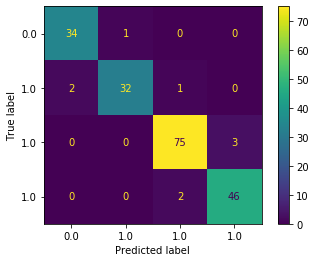

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
predictions = model.predict(X_test)

cf = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=y)
disp = disp.plot()
plt.show


print(classification_report(y_test, predictions))

In [5]:
df_health['gender_code'] = 0
df_health.loc[ df_health['gender'] == 'male', 'gender_code'] = 1
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  gender_code  
1                   0            1  
2                   1            1  
4                   1            1  
5                   1            0  
6                   2            0  
...               ...          ...  
1332                3            0  
1333                3            1  
1334                0            0  
1335                0            0  
1336                0            0  

[980 rows x 9 columns]

## Assign a code for smoking/non-smoking
* smoker : 1
* non-smoker : 0

In [6]:
df_health['smoker_code'] = 0
df_health.loc[ df_health['smoker'] == 'yes', 'smoker_code'] = 1
df_health

age  gender    bmi  children smoker     region     charges  \
1      18    male  33.77         1     no  southeast   1725.5523   
2      28    male  33.00         3     no  southeast   4449.4620   
4      32    male  28.88         0     no  northwest   3866.8552   
5      31  female  25.74         0     no  southeast   3756.6216   
6      46  female  33.44         1     no  southeast   8240.5896   
...   ...     ...    ...       ...    ...        ...         ...   
1332   52  female  44.70         3     no  southwest  11411.6850   
1333   50    male  30.97         3     no  northwest  10600.5483   
1334   18  female  31.92         0     no  northeast   2205.9808   
1335   18  female  36.85         0     no  southeast   1629.8335   
1336   21  female  25.80         0     no  southwest   2007.9450   

      charge_category  gender_code  smoker_code  
1                   0            1            0  
2                   1            1            0  
4                   1            1            0  
5                   1            0            0  
6                   2            0            0  
...               ...          ...          ...  
1332                3            0            0  
1333                3            1            0  
1334                0            0            0  
1335                0            0            0  
1336                0            0            0  

[980 rows x 10 columns]

### Now train a logistic regression model to predict the charge category for a person
Separate the dataframe into:

* X: independent variable matrix  - this is the first 4 columns
* y: dependant variable vector    - this is just the 'class' column

In [12]:
# Make a variable called X here that contains just the first 4 columns of df_health


age
1      18
2      28
4      32
5      31
6      46
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[980 rows x 1 columns]

Split our dataset into training and test sets

In [ ]:
# Split the dataset into train and test sets - use the scikit learn "train_test_split" function

Create a logistic model or Neural Net e.g. (sklearn.neural_network.MLPClassifier) object and train with the training data

In [ ]:
# Choose a model to train (e.g. create an object of the type mentioned abeve, or a different scikit learn Classification type)
# the MLPClassifier might take parameters on creation such as: MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Then call model.fit to train your model
..

Validate the accuracy with the test data

In [ ]:
# import the confusion matrix from sklearn.metrics

# now call model.predict with the test data


# use the confusion matrix to check the validity of those predictions

Most models will have a function to get the probability of being in each category for a particular prediction (e.g. predict_proba)

In [ ]:
# use predict_proba